In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt

from tenpy.algorithms.truncation import svd_theta
from tenpy.networks.mps import MPS
from tenpy.models.model import CouplingMPOModel
from tenpy.networks.site import BosonSite

from modules.myDMRG import SimpleDMRGEngine_Boson

## Model

In [21]:
class myModel(CouplingMPOModel):
    
    def init_sites(self, model_params):
        n_max = model_params.get('n_max', 0)
        filling = model_params.get('filling', 0)
        conserve = model_params.get('conserve', 'N')
        if conserve == 'best':
            conserve = 'N'
            self.logger.info("%s: set conserve to %s", self.name, conserve)
        site = BosonSite(Nmax=n_max, conserve=conserve, filling=filling)
        return site

    def init_terms(self, model_params):
        # 0) Read and set parameters.
        rc = model_params.get('rc', 0)
        t = model_params.get('t', 1.)
        U = model_params.get('U', 0.)
        V = model_params.get('V', 0.)
        mu = model_params.get('mu', 0)
        for u1, u2, dx in self.lat.pairs['nearest_neighbors']:
            print('add t')
            self.add_coupling(-t, u1, 'Bd', u2, 'B', dx, plus_hc=True)
            #self.add_coupling(-np.conj(t), u2, 'Bd', u1, 'B', -dx)#, plus_hc=True)
        for dx in range(1,rc+1):
            self.add_coupling(V, 0, 'N', 0, 'N', dx)

***

add t


<BarContainer object of 48 artists>

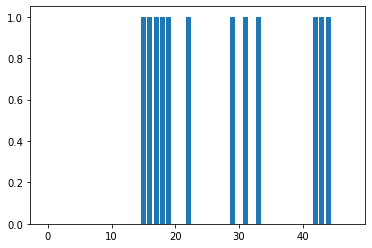

In [208]:
avg_n = 1/4
model_params = dict(L=48, n_max=1, t=1, V=100, rc=4, conserve='N', filling=avg_n, bc_MPS='finite', bc_x='periodic')
M = myModel(model_params)
product_state = ['1']*int(M.lat.N_sites*avg_n) + ['vac']*int(M.lat.N_sites*(1-avg_n))
random.shuffle(product_state)
psi = MPS.from_product_state(M.lat.mps_sites(), product_state, bc=M.lat.bc_MPS)
plt.bar(range(48), psi.expectation_value('N'))

In [209]:
prova = SimpleDMRGEngine_Boson(psi, M, chi_max=100, eps=1.e-10)

In [220]:
for ii in range(1):
    prova.sweep()

13792.178644426434 13792.178637642444


<BarContainer object of 48 artists>

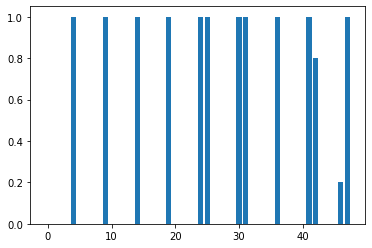

In [221]:
plt.bar(range(48),prova.psi.expectation_value('N'))

In [189]:
print(psi)

MPS, L=48, bc='finite'.
chi: [2, 4, 8, 16, 32, 48, 60, 68, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 74, 66, 51, 32, 16, 8, 4, 2]
first two sites: BosonSite(1, 'N', 0.250000) BosonSite(1, 'N', 0.250000)
first two forms:(1.0, 0.0) (1.0, 0.0)


In [178]:
M.coupling_terms['N_i N_j'].coupling_terms

{0: {('N', 'Id'): {1: {'N': 100},
   47: {'N': 100},
   2: {'N': 100},
   46: {'N': 100}}},
 1: {('N', 'Id'): {2: {'N': 100}, 3: {'N': 100}, 47: {'N': 100}}},
 2: {('N', 'Id'): {3: {'N': 100}, 4: {'N': 100}}},
 3: {('N', 'Id'): {4: {'N': 100}, 5: {'N': 100}}},
 4: {('N', 'Id'): {5: {'N': 100}, 6: {'N': 100}}},
 5: {('N', 'Id'): {6: {'N': 100}, 7: {'N': 100}}},
 6: {('N', 'Id'): {7: {'N': 100}, 8: {'N': 100}}},
 7: {('N', 'Id'): {8: {'N': 100}, 9: {'N': 100}}},
 8: {('N', 'Id'): {9: {'N': 100}, 10: {'N': 100}}},
 9: {('N', 'Id'): {10: {'N': 100}, 11: {'N': 100}}},
 10: {('N', 'Id'): {11: {'N': 100}, 12: {'N': 100}}},
 11: {('N', 'Id'): {12: {'N': 100}, 13: {'N': 100}}},
 12: {('N', 'Id'): {13: {'N': 100}, 14: {'N': 100}}},
 13: {('N', 'Id'): {14: {'N': 100}, 15: {'N': 100}}},
 14: {('N', 'Id'): {15: {'N': 100}, 16: {'N': 100}}},
 15: {('N', 'Id'): {16: {'N': 100}, 17: {'N': 100}}},
 16: {('N', 'Id'): {17: {'N': 100}, 18: {'N': 100}}},
 17: {('N', 'Id'): {18: {'N': 100}, 19: {'N': 100}}}

In [19]:
#help(tmp.coupling_terms['N_i N_j'])